# Multivariate Time Series Analysis

## Analysis of Power Consumption Data

KATE expects your code to define variables with specific names that correspond to certain things we are interested in.

KATE will run your notebook from top to bottom and check the latest value of those variables, so make sure you don't overwrite them.

* Remember to uncomment the line assigning the variable to your answer and don't change the variable or function names.
* Use copies of the original or previous DataFrames to make sure you do not overwrite them by mistake.

You will find instructions below about how to define each variable.

Once you're happy with your code, upload your notebook to KATE to check your feedback.

Time series containing historical data for a single variable are known as univariate time series. When multiple variables are involved to predict an outcome over time, this is referred to as multivariate time series. In this case, we use the historical data from multiple different variables in order to generate a forecast.

In this practical, we consider the analysis of power consumption data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error

/var/folders/00/h4l_zl594z1g4kp3qw9d3bdc0000gn/T/ipykernel_3996/3205569939.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


First, we will load the dataset from `data/household_power_consumption.csv` into a DataFrame. The dataset is available [here](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption).

The parameter settings parsed are:

 - `index_col = 'dt'` Set the new datetime format column as the index
 - `na_values=['nan','?']` Allows any occurences of 'nan' or '?' to be recognised as NaN.
 - `parse_dates = [0] ` Specifies the index of the column that has to be parsed as datetime. 
 - `infer_datetime_format=True` When combined with the parse_dates argument, this infers the format of the datetime strings in an efficient way

In [2]:
df = pd.read_csv('data/household_power_consumption.csv',low_memory=False, 
                 na_values=['nan','?'], index_col='dt', parse_dates=[0], infer_datetime_format=True)

/var/folders/00/h4l_zl594z1g4kp3qw9d3bdc0000gn/T/ipykernel_3996/991577190.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('data/household_power_consumption.csv',low_memory=False,


In [3]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


This dataset contains multivariate time series data describeing the electricity consumption for a single household over four years. It spans December 2006 to November 2010, with the data recorded at minute intervals.

There are seven variables in this time series, being:

    global_active_power: The total active power consumed by the household (kilowatts).
    global_reactive_power: The total reactive power consumed by the household (kilowatts).
    voltage: Average voltage (volts).
    global_intensity: Average current intensity (amps).
    sub_metering_1: Active energy for kitchen (watt-hours of active energy).
    sub_metering_2: Active energy for laundry (watt-hours of active energy).
    sub_metering_3: Active energy for climate control systems (watt-hours of active energy).


Before beginning any analysis we need to explore the data and ensure it is clean and in a suitable format.

Let's first check the data types to be sure they are in the correct format

In [4]:
df.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


## Clean the data

**1. How many values are NaNs in each column? Store your answer in a variable called `sum_nans`**

*Hint: `isna()` will do a Boolean check of if an entry is an NaN or not. Summing these will give you a count.* 

In [6]:
# Add your code below
sum_nans = df.isna().sum()
sum_nans

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

**2. Fill the NaNs in `df` by propagating last valid observation forward**

*Hint: This is one of the possible methods available in the function `fillna()`*

In [7]:
# Add your code below
df = df.fillna(method='ffill')


/var/folders/00/h4l_zl594z1g4kp3qw9d3bdc0000gn/T/ipykernel_3996/1544270911.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


**3. Make sure that there are no NaNs remaining in each column. Store the sum of NaNs value in each column in a Pandas Series called `sum_nans2`**

In [8]:
# Add your code below
sum_nans2 = df.isna().sum()
sum_nans2

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Avoid modifying `df` itself in the subsequent questions.

## Visualise the data

We can now begin to visualise the data and decide on the problem we would like to investigate. 

**4. What is the shape of the dataframe `df`?**

Store your answer in a variable called `df_shape`**

In [9]:
# Add your code below
df_shape = df.shape
df_shape

(2075259, 7)

As the data is recorded at minute intervals, this means we have a very large dataset. With such precise time series data, it can be useful to downsample the activity to daily, weekly or even monthly data. 

**5. Create two new dataframes by downsampling `df` to contain daily data.** 

Store in `daily_total` the dataframe with the total amounts for each day, and in `daily_mean` the one with average amount per day.

*Hint*: Use the `resample()` function specifying 'D' to indicate daily data. You will then need to apply either a summation or a mean function in order to combine the results across each day.

In [10]:
# Add your code below
daily_total = df.resample('D').sum()
daily_mean = df.resample('D').mean()


**6. Create two new dataframes by downsampling `df` to contain weekly data.** 

Store in `weekly_total` the dataframe with the total amounts for each week, and in `weekly_mean` the one with average amount per week.

In [11]:
# Add your code below
weekly_total = df.resample('W').sum()
weekly_mean = df.resample('W').mean()


We can plot our data using the function defined below.

In [12]:
def plot_dataframe(dataframe):
    '''
    This function takes in a pandas dataframe and plots data for all columns provided in a grid of size n_rowsx2,
    where n_rows is ceil(cols/2) and cols is the number of provided columns in the dataframe.
    '''
    # Get the number of columns
    cols = dataframe.shape[1]
    # Create a figure of suitable size
    n_rows = int(np.ceil(cols/2))
    n_cols = 2
    fig, axs = plt.subplots(n_rows, n_cols, figsize = (30, 25));
    # Set the titles to be those of the dataframe variable names 
    columns = dataframe.columns
    # In each position, plot the relevant data
    counter = 0
    # If we have an odd number of subplots to make, do the last one separately
    if cols%2 != 0:
        n_rows -= 1
        axs[n_rows, 0].plot(dataframe[columns[-1]]);
        axs[n_rows, 0].set_title(columns[-1], fontweight = 'bold', size = 20);
        fig.delaxes(axs[n_rows, 1])   
    # Do the remaining plots 
    for i in range(n_rows):
        for j in range(n_cols):
            axs[i, j].plot(dataframe[columns[counter]]);
            axs[i, j].set_title(columns[counter], fontweight = 'bold', size = 20);
            counter += 1
    # Show the plot
    plt.show()
    return 
    

Uncomment the following cell to plot the first 4 columns of the `daily_mean` using the function `plot_data`

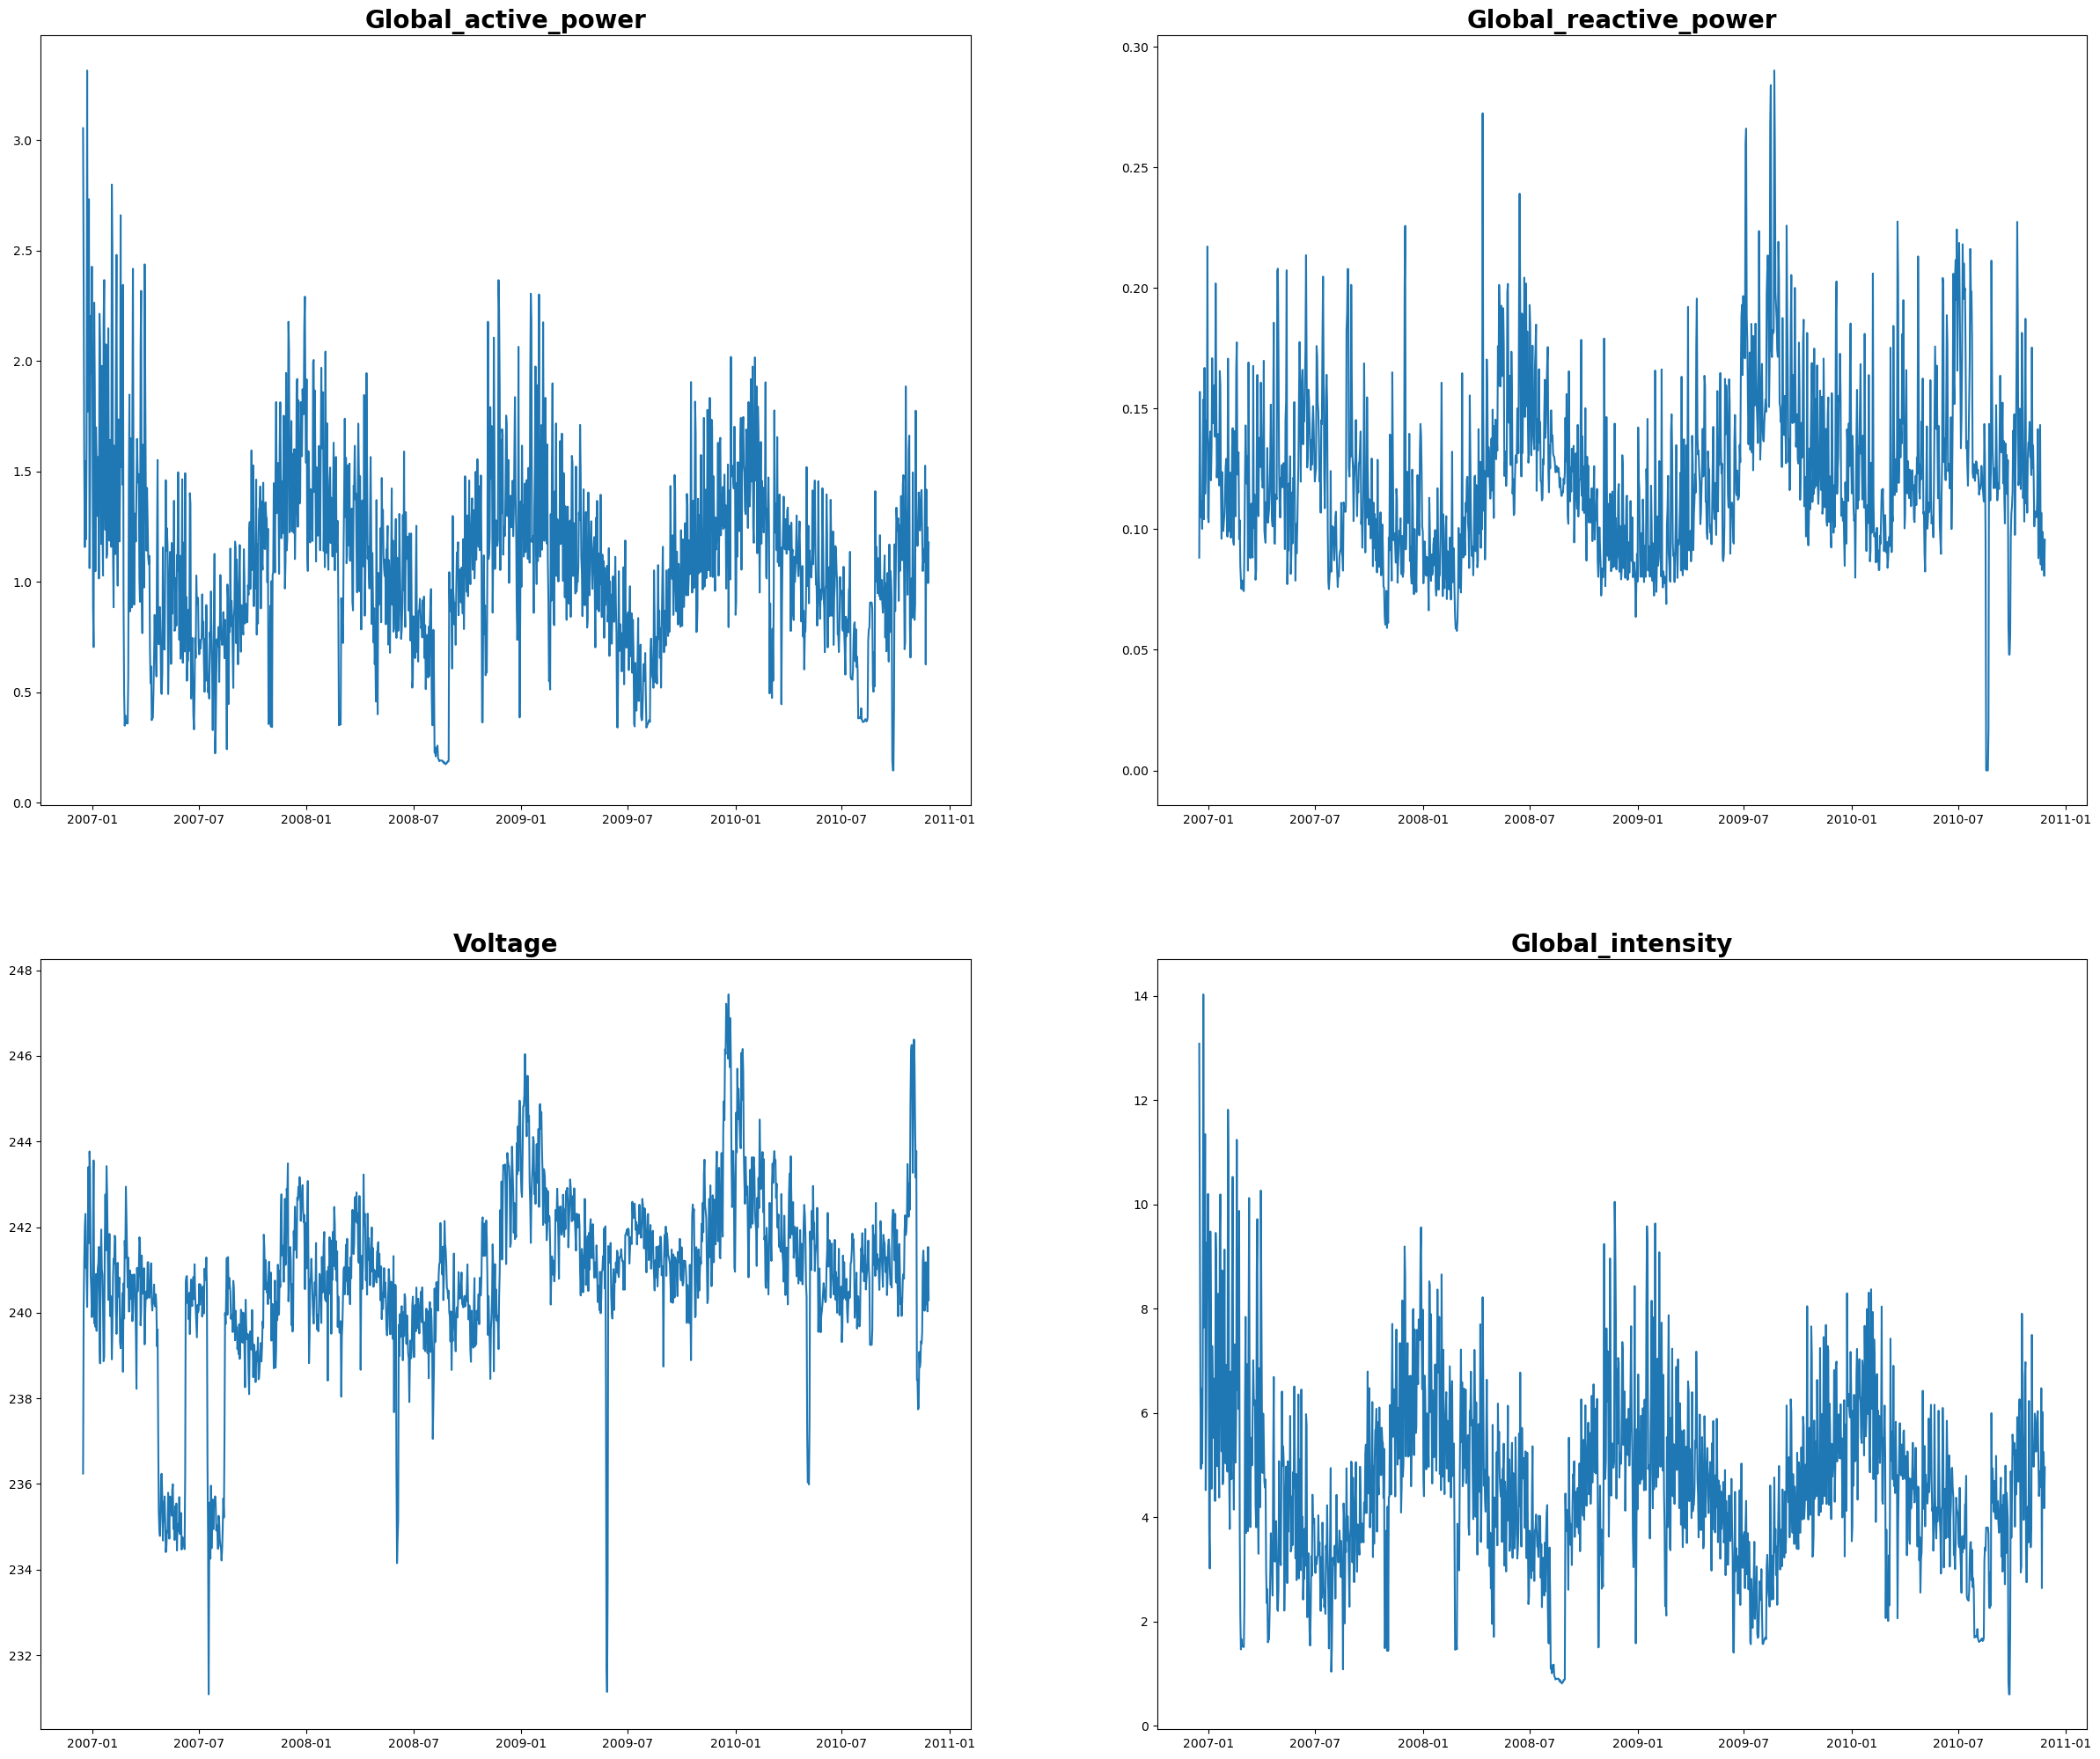

In [13]:
meandaily_plot = plot_dataframe(daily_mean.iloc[:,0:4])

Uncomment the following cell to produce the same figures for the daily totals

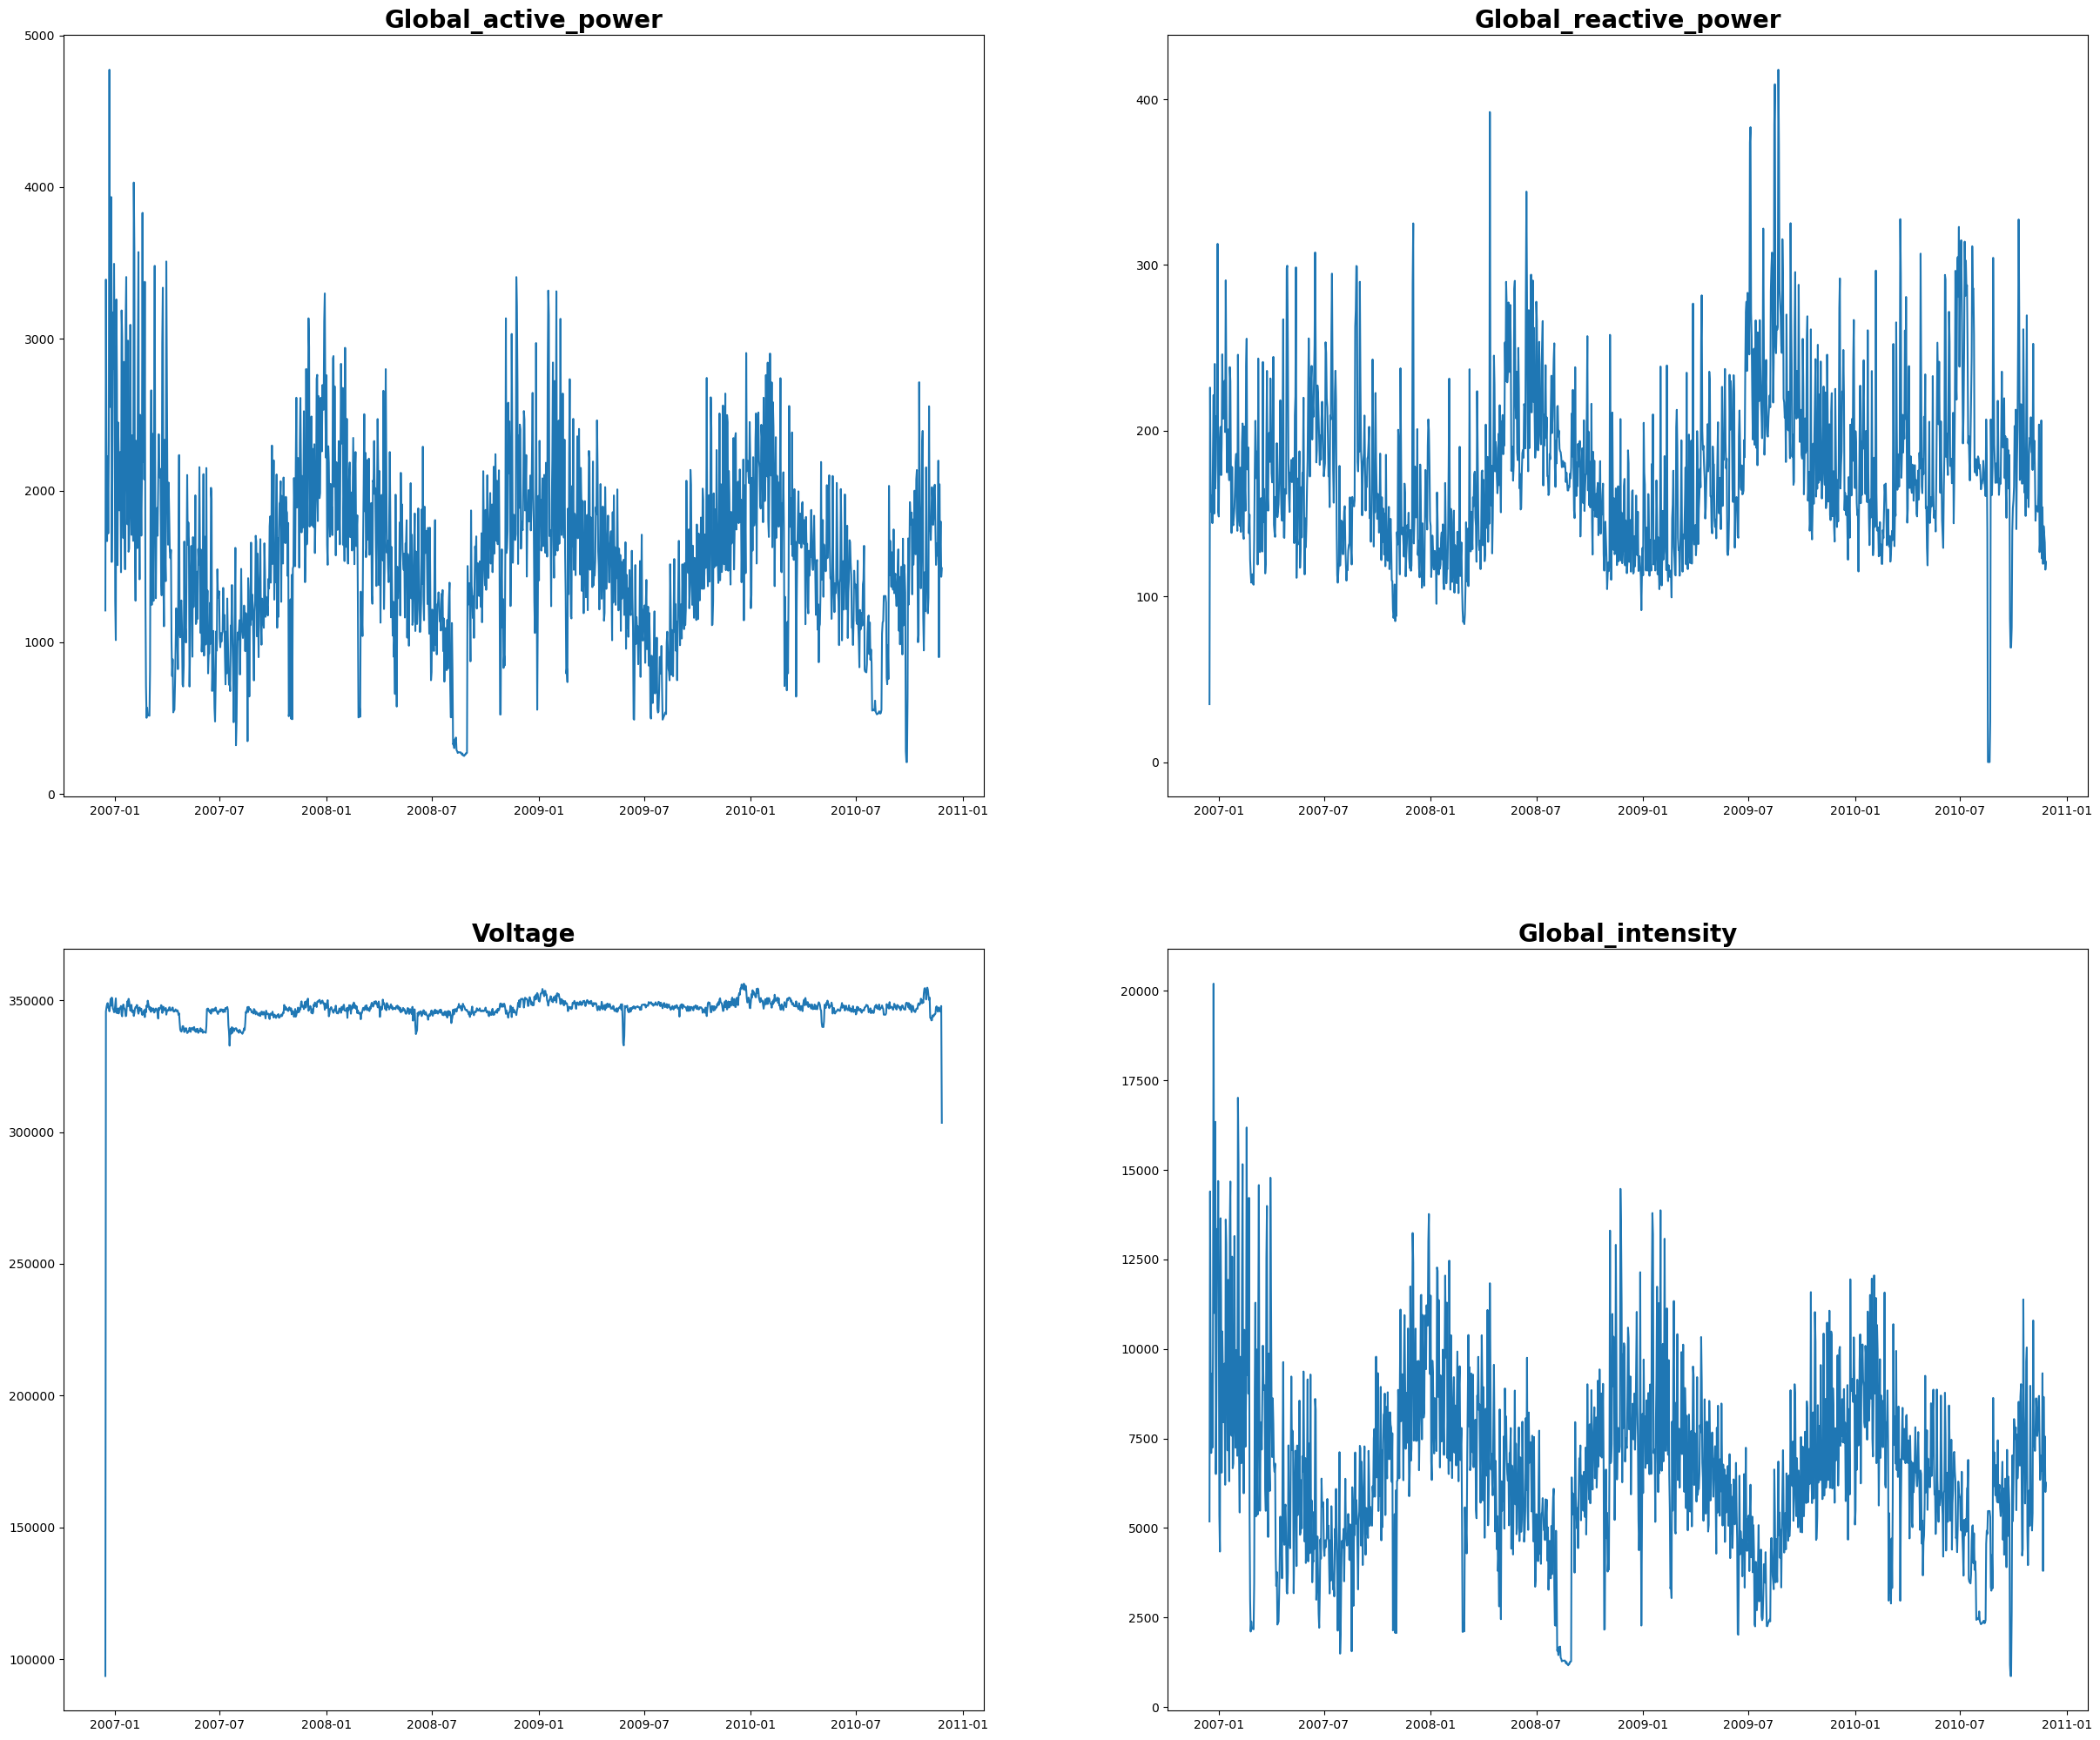

In [14]:
totaldaily_plot = plot_dataframe(daily_total.iloc[:,0:4])


As expected, the overall shape is extremely similar when considering the daily means or the daily totals. We can repeat this for the weekly data and present the mean values of the left and total values on the right. To do this, we define the below function `plot_twodfs`. 

In [15]:
def plot_twodfs(dataframe1, dataframe2):
    """
    A function which plots the data from each dataframe side by side.
    This is such that column 0 of each dataframe will be side by side in row 0 of a 2x2 figure, and so on for all columns. 
    NOTE: Therefore dataframe1 and dataframe2 must have the same number of columns.
    """
    if dataframe1.shape[1] != dataframe2.shape[1]:
        print('Error: dataframe1 and dataframe2 must have the same number of columns')
        return
    
    n_rows = dataframe1.shape[1]
    n_cols = 2
    fig, axs = plt.subplots(n_rows, 2, figsize = (30, 25))
    
    columns1 = dataframe1.columns
    columns2 = dataframe2.columns
    
    for i in range(n_rows):
        axs[i, 0].plot(dataframe1[columns1[i]]);
        axs[i, 0].set_title('Dataframe1: '+ columns1[i], fontweight = 'bold', size = 20);

        axs[i, 1].plot(dataframe2[columns2[i]]);
        axs[i, 1].set_title('Dataframe2: '+ columns2[i], fontweight = 'bold', size = 20);
    # Show the plot
    plt.show()    
    
    return

Uncomment the following cell to use the function `plot_twodfs` to plot the first 4 columns of the weekly mean data alongside the first 4 columns of the weekly total data. 

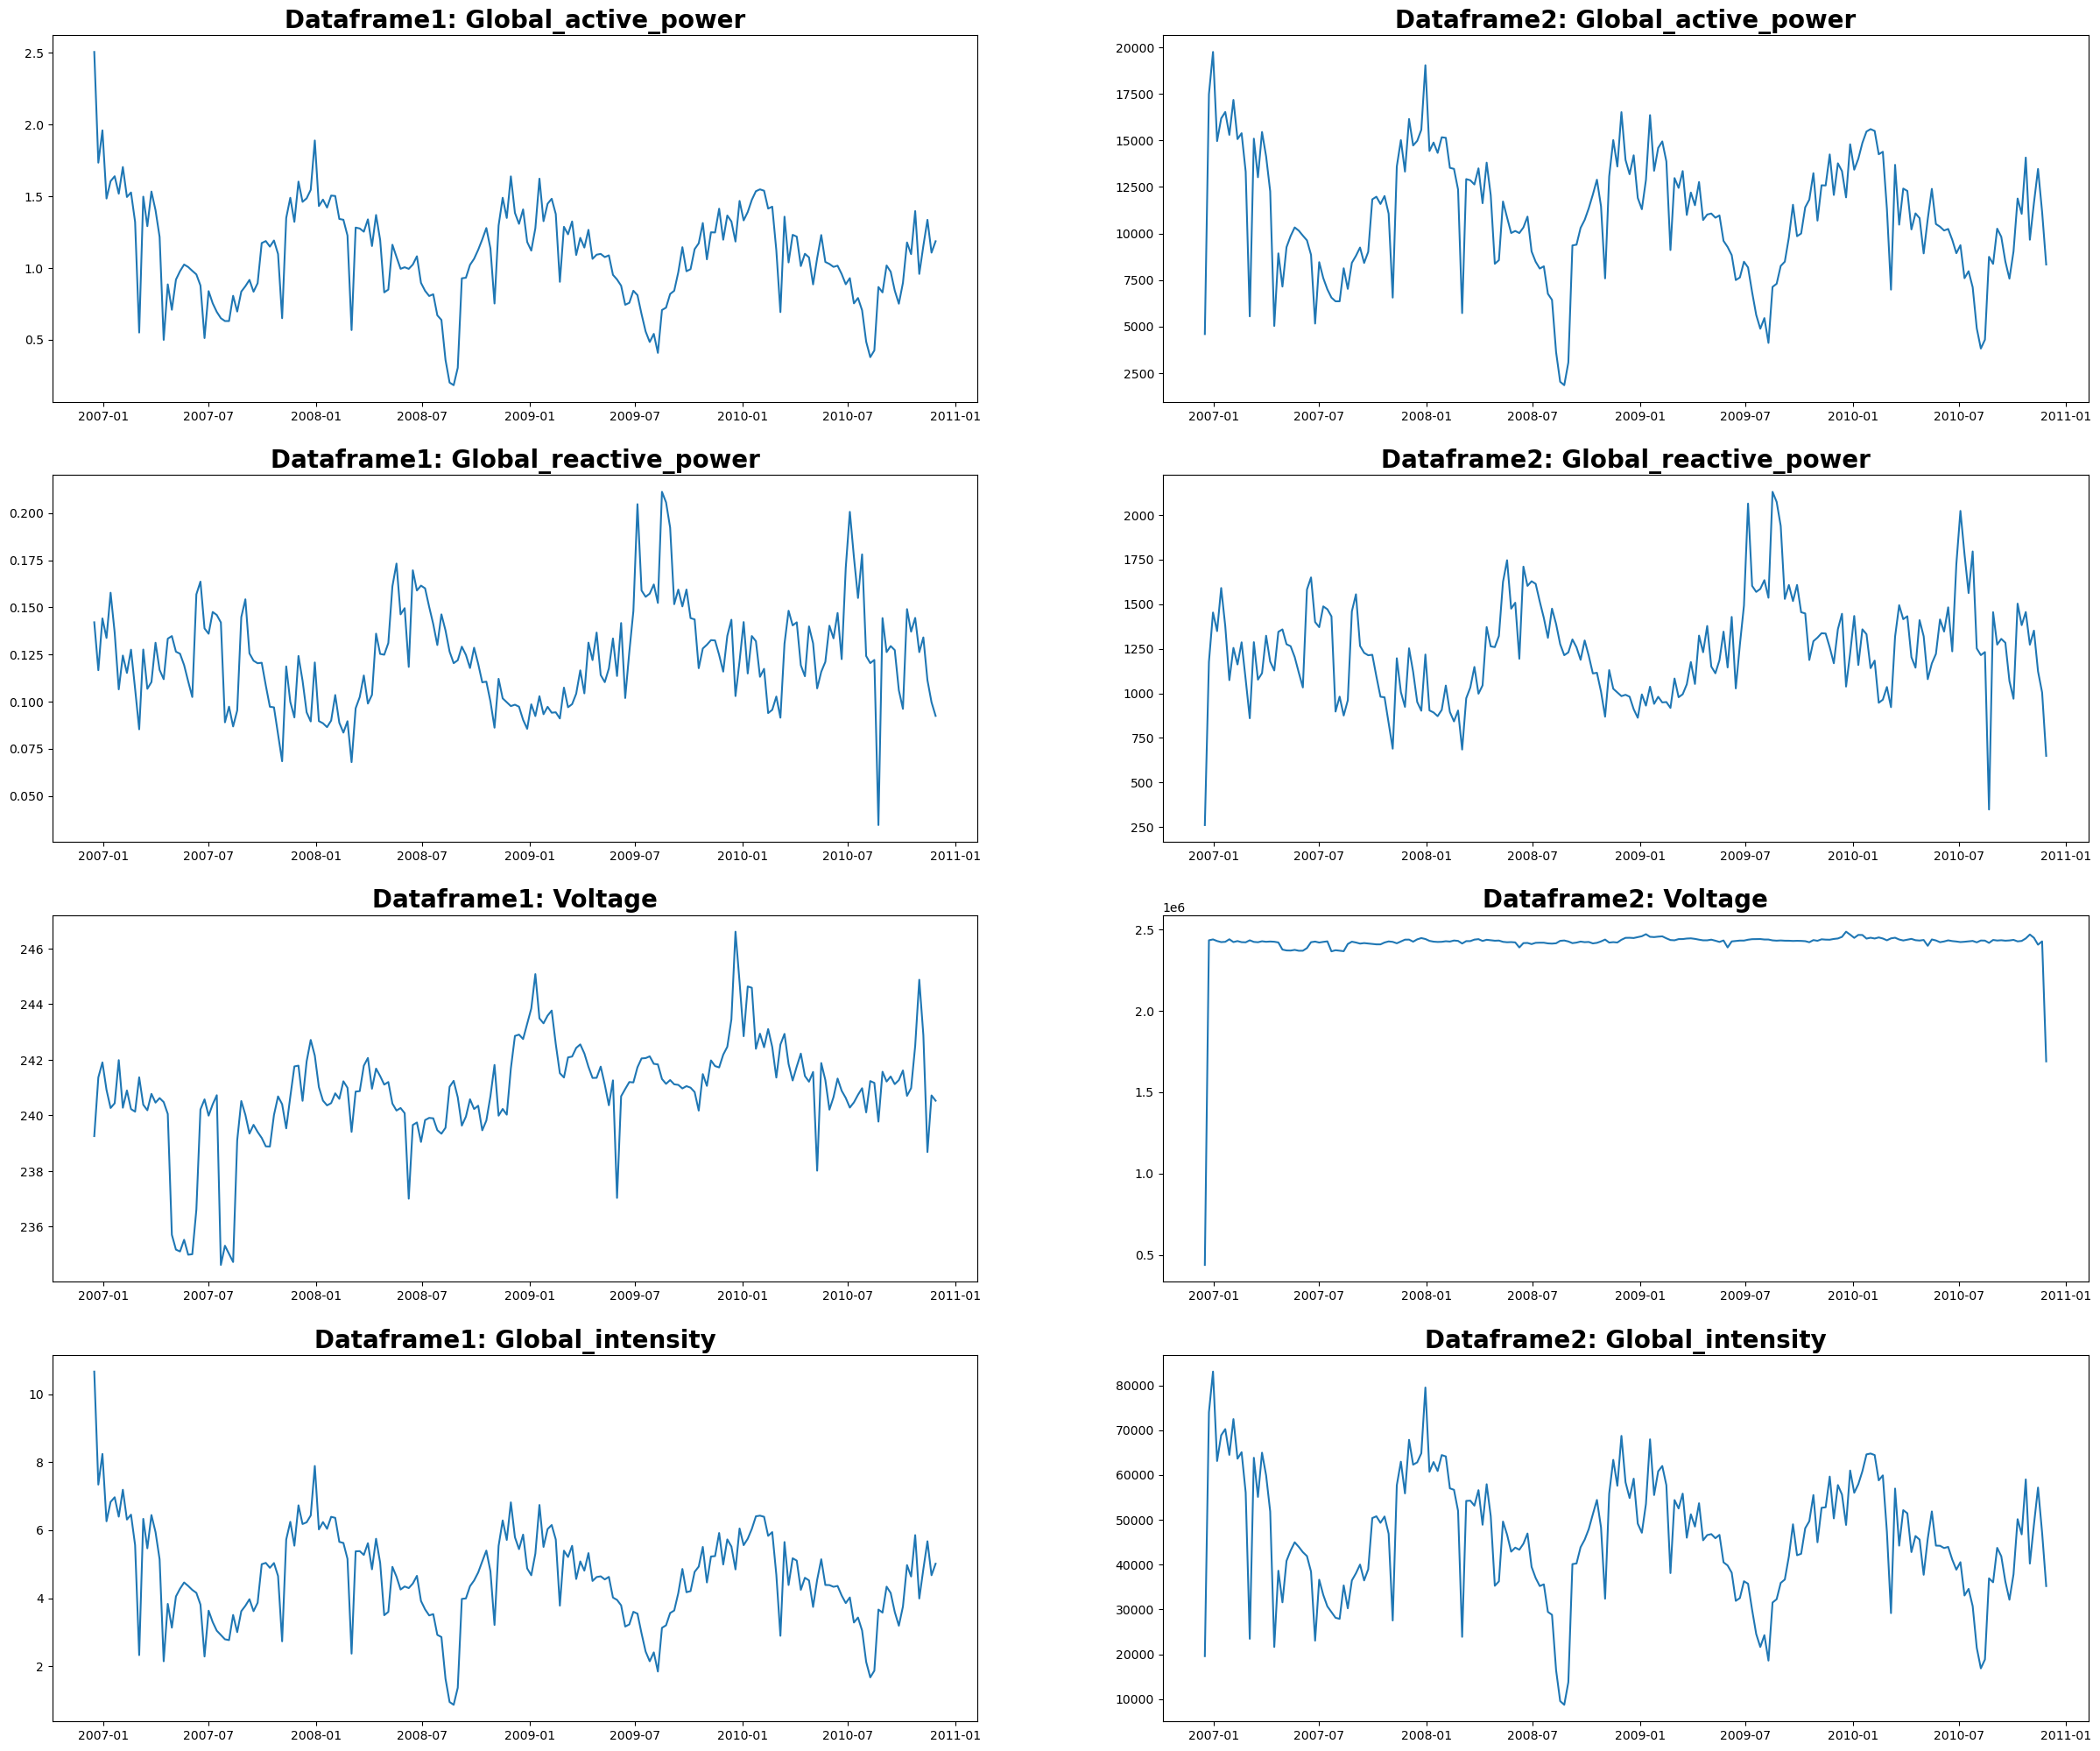

In [16]:
wmt = plot_twodfs(weekly_mean.iloc[:,0:4], weekly_total.iloc[:,0:4])

For this practical, we will try to predict the global active power for different intervals using the daily mean values. 
This is one of the multiple analysis that could be carried on this dataset.

## Explore the data further

As part of the exploratory analysis of the dataset we first decompose the the series to find the trend, seasonal and residual components.

**7. Using the `seasonal_decompose` function, explore the daily mean `Global_active_power` values.** 

Store its trend, seasonal and residual components in the homonymous variables.

*Hint*: Use the argument `period` to see if there is an annual seasonality component 

In [17]:
daily_mean['Global_active_power'].isna().sum()

0

In [18]:
# Add your code below
DecomposeResult = seasonal_decompose(daily_mean['Global_active_power'], period=365)
trend = DecomposeResult.trend
seasonal = DecomposeResult.seasonal
residual = DecomposeResult.resid
seasonal

dt
2006-12-16    0.419272
2006-12-17    0.070451
2006-12-18    0.405594
2006-12-19    0.229020
2006-12-20    0.311791
                ...   
2010-11-22    0.463555
2010-11-23    0.485023
2010-11-24    0.476078
2010-11-25    0.364352
2010-11-26    0.286749
Freq: D, Name: seasonal, Length: 1442, dtype: float64

We now define the following function which will plot the results of the seasonality decomposition.

In [19]:
def plot_decomposition(original, trend, seasonal, residual):
    """
    Plot the components of a decomposition. Pass in the original univarate data which was decomposed, and then the 
    3 resulting components, being the trend, seasonal and residual parts. 
    """
    # Plot the results
    plt.subplot(411)
    plt.plot(original, label = 'Original');
    plt.legend(loc = 'best')
    plt.subplot(412)
    plt.plot(trend, label = 'Trend');
    plt.legend(loc = 'best')
    plt.subplot(413)
    plt.plot(seasonal, label = 'Seasonality');
    plt.legend(loc = 'best')
    plt.subplot(414)
    plt.plot(residual, label = 'Residuals');
    plt.legend(loc = 'best')
    plt.tight_layout()
    plt.show()
    return

Uncomment the following cell to create a 4-by-1 figure showing the original series(`daily_mean['Global_reactive_power']`) and its `trend`, `seasonal` and `residual` components.

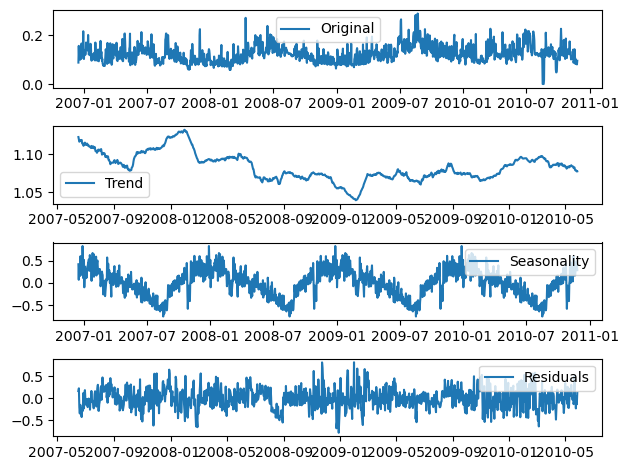

In [20]:
seasonality_plot = plot_decomposition(daily_mean['Global_reactive_power'], trend, seasonal, residual)

### Stationarity for Multivariate Time Series

Recall that stationarity is an important feature of time series data and that a stationary time series has properties that do not depend on time. In particular, the mean and variance are independent of time.

As in the univariate case, when looking at multivariate data, we need each column to be a stationary time series in order to be able to apply many common time series models. 

To do this, we use the Augmented Dickey-Fuller test, which is a statistical test for stationarity. 

**8. Write a function, `adf_test` which does the following:**

 - Takes in input of a column of a dataframe, `df_col`.

 - Define `dftest` to be the result of applying the function `adfuller()` to `df_col`. 

 - Set `p` to store the p-value. This will be contained as one of the entries in the `dftest` tuple.

 - Creates the variable `result` in the following way: if p<=0.05 it contains the string "column_name is stationary", otherwise contains the string "column_name is not stationary".

 - returns `result`

One example of an accepted output is the following: 'Global_active_power is stationary'

*Note*: The Augmented Dickey-Fuller test generates a tuple consisting of 6 parameters: 
 - the ADF test statistic
 - the p-value
 - number of lags used
 - number of observations used
 - critical values at 1%, 5%, 10% levels
 - the maximized information criterion (icbest).
 
*Hint*: to get the column name you can use `df_col.name`

In [21]:
# Add your code below
def adf_test(df_col):
    dftest = adfuller(df_col)
    p = dftest[1]
    column_name = df_col.name
    if p <= 0.05:
        result = f"{column_name} is stationary"
    else:
        result = f"{column_name} is not stationary"
    return result


Uncomment the following cell to check if the columns of `daily_mean` are stationary.

In [22]:
for i in range(daily_mean.shape[1]):
    print(adf_test(daily_mean.iloc[:,i]))

Global_active_power is stationary
Global_reactive_power is stationary
Voltage is stationary
Global_intensity is stationary
Sub_metering_1 is stationary
Sub_metering_2 is stationary
Sub_metering_3 is stationary


We have been lucky, since all the columns are stationary. If this wasn't the case, we would precede by differencing and redoing the dickey fuller test. This step of checking for stationarity plus differencing might have to be repeated more than once to fully ensure all variables are stationary.

## Cross correlation 

The final aspect we need to consider before building our model is the correlations amongst features. There are several ways to consider the correlation between time series including Pearson correlation, Spearman correlation, and cross-correlation functions. 

Note that when two time series variables are non-stationary, they may show strong correlation even through the underlying processes have no casual relationships. This strong correlation may be purely caused by the fact that the two time series variables have non-constant mean. This phenomenon is called spurious relationship and is worth considering in the non-stationary case.

For extra material on quantifying correlation see the link [here](https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9).

**9. Use the `.corr()` function on the `daily_mean` dataframe to get the correlation between the variables. In particular, specify `spearman` as the method to use. Store the output in `daily_corr`.**

*Note*: Spearman's correlation assesses if relationships are linear or not. A perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect linear function of the other. 

In [23]:
# Add your code below
daily_corr = daily_mean.corr(method='spearman')


We can visualize the correlation matrix as a heatmap using the function `sns.heatmap()`. Uncomment the following cell to visualize `daily_corr`.

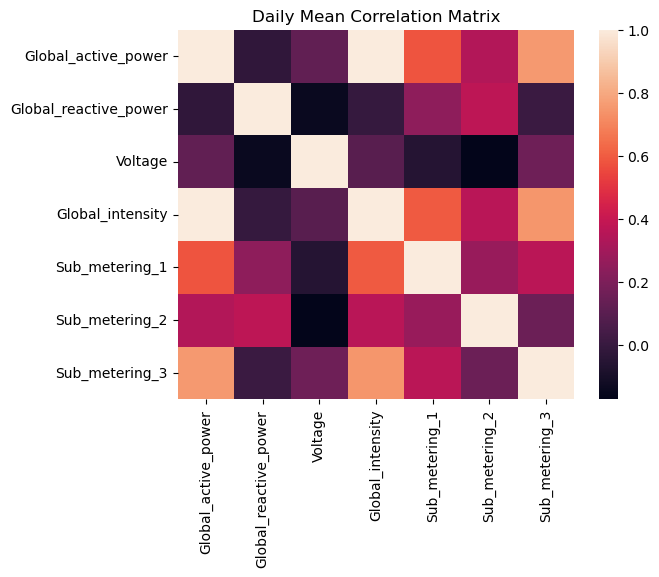

In [24]:
hm1 = sns.heatmap(daily_corr, 
        xticklabels=daily_mean.columns,
        yticklabels=daily_mean.columns);
hm1.set_title('Daily Mean Correlation Matrix');

We can see from the above heatmap that the daily global active power is very strongly correlated with the global intensity, and strongly correlated with all of the sub metering measurements. 

Uncomment the following cell to visualize the correlation heatmap for `weekly_mean`. What do you notice?

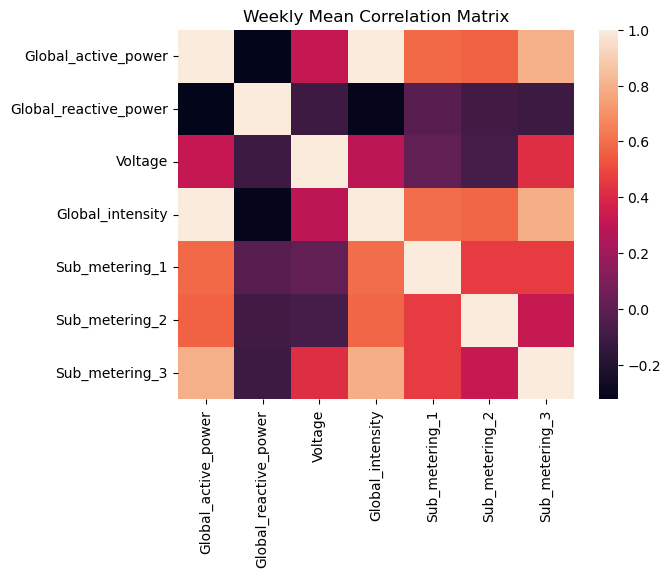

In [25]:
hm2 = sns.heatmap(weekly_mean.corr(method='spearman'), 
        xticklabels=weekly_mean.columns,
        yticklabels=weekly_mean.columns);
hm2.set_title('Weekly Mean Correlation Matrix');

We can see that with resampling techniques it is possible to change the correlations among features. This is an important point to keep in mind for feature engineering.

## Building the Model: VAR


Vector autoregression (VAR) is a very flexible and easy to use model for the analysis of multivariate time series. It is an extension of the univariate AR model. 

In a VAR model, each variable is a linear function of the past values of itself and the past values of all the other variables. 

Consider the case of bivariate data, that is we have 2 time series of interest. Using 1 lag, VAR will model the following:

<br>


```Python
y1(t) = a1 + w11 * y1(t-1) + w12 y2(t-1) + e1(t-1)
```

and

```Python
y2(t) = a2 + w21 * y1(t-1) + w22 y2(t-1) + e2(t-1)
```

Here: 
- `a1` and `a2` are the constant terms,
- `w11`, `w12`, `w21`, and `w22` are the coefficients,
- `e1` and `e2` are the error terms

This can be extended and written in matrix notation for lag up to `p` as: 

```Python
y(t) = a + w1 * y(t-1) + ... + wp * y(t-p) + e(t), 
```

where now, `y` is a vector containing `y1`, `y2`, all the way up to `yp`, and `w1` is a vector containing the values `w11`, `w12`, all the way up to `wp`. Lastly `e` is a vector containing all of the error terms.

You can find the documentation about the VAR model [here](https://www.statsmodels.org/dev/vector_ar.html).

We will now consider 3 types of forecasting problems as assess how the VAR model performs in each.

1) Predicting 1 week ahead based on all historical data. This is a fairly short-term forecast.

2) Predicting 2 months ahead based on all historical data. This is a much longer term forecast. 

3) Multi-step forecast for 1 month. This involves making a prediction for one time step, taking the prediction, and feeding it into the model as an input in order to predict the subsequent time step. This process is repeated until the desired number of steps have been forecasted. In practice this can be very useful, especially in conjunction with other forecasts as it allows us to make full use of the current and updated data.

### Predicting 1 week ahead.

**10. Create a copy of the `daily_mean` dataframe and store it in `model_ds`.**

In [26]:
# Add your code below
model_ds = daily_mean.copy()


**11. Create two new DataFrames. The first one, `ds_train1`, with all the rows of `model_ds` except for the last 7. The second one, `ds_test1`, with only the last 7 rows of `model_ds`.**

In [27]:
# Add your code below
ds_train1 = model_ds.iloc[:-7]
ds_test1 = model_ds.iloc[-7:]


**12. Using the function `VAR`, define the model using `ds_train1`. Then fit via the `.fit()` function and define the result as `model1_fit`.**

In [28]:
# Add your code below
model1_fit = VAR(ds_train1).fit()


In [29]:
print(model1_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 02, Mar, 2024
Time:                     22:58:41
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -15.7636
Nobs:                     1434.00    HQIC:                  -15.8925
Log likelihood:          -2737.30    FPE:                1.16040e-07
AIC:                     -15.9693    Det(Omega_mle):     1.11608e-07
--------------------------------------------------------------------
Results for equation Global_active_power
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                           -5.993137         1.417079           -4.229           0.000
L1.Global_active_power          -0.795581         0.882496           -0.902           0.367
L1

Uncomment the following cell to print the summary of `model1_fit`.

The summary provides us with information about the model fit. We can see the AIC reported and also standard errors and results for the full multivariate model. We are only interested in the results for the equation global active power as this is what we are forecasting. 

**13. Create an array `prediction1` that contains the predictions on the 7 values of `ds_test1`.**   

You can use the `forecast` function with parameters `model1_fit.endog`, and `steps` as the length for which we wish to forecast.

*Note*: `model1_fit.endog` contains an np array of `ds_train1` and so you can also use `np.asarray(ds_train1)`.

In [30]:
# Add your code below
prediction1 = model1_fit.forecast(y=model1_fit.endog, steps=len(ds_test1)) 


You can notice that the prediction contains a large array of forecasts for each of the columns in our dataset. We are interested in column 0. Therefore we define the below function `transform_prediction` which converts the model forecast result to an array of univariate predictions for the `Global_active_power`. 

In [31]:
def transform_prediction(prediction):
    return [prediction[i][0] for i in range(len(prediction))]

Using `transform_prediction` we convert the model forecast to predictions that we can compare to our test data. Uncomment the following cell to plot `predictions_7day` against the actual data.

In [32]:
predictions_7day = transform_prediction(prediction1)

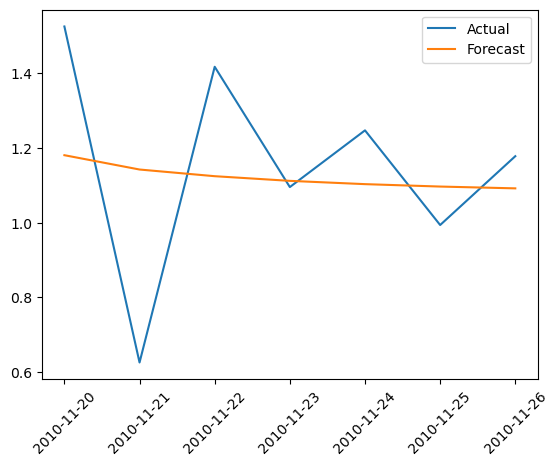

In [33]:
fig1 = plt.figure()
plt.plot(ds_test1.index, ds_test1.iloc[:,0], label='Actual');
plt.plot(ds_test1.index, predictions_7day, label='Forecast');
plt.xticks(rotation=45);
plt.legend();

**14. What is the mean absolute error between the test data for global active power and our 7 day prediction?**

Store your answer in a variable called `MAE1`

In [34]:
# Add your code below
MAE1 = mean_absolute_error(ds_test1.iloc[:,0], predictions_7day)


### Predicting 2 months ahead. 
#### Using the methodology given for the 1 week forecast, we will now predict 2 months ahead.

**15. Create two new DataFrames. The first one, `ds_train2`, with all the rows of `model_ds` except for the last 60. The second one, `ds_test2`, with only the last 60 rows of `model_ds`.**

In [35]:
# Add your code below
ds_train2 = model_ds.iloc[:-60]
ds_test2 = model_ds.iloc[-60:]


**16. Create a variable named `model2_fit` where you store the `VAR` model fitted on `ds_train2`.**

In [36]:
# Add your code below
model2_fit = VAR(ds_train2).fit()


Uncomment the following cell to print the summary of `model2_fit`.

In [37]:
print(model2_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 02, Mar, 2024
Time:                     22:58:41
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -15.7417
Nobs:                     1381.00    HQIC:                  -15.8744
Log likelihood:          -2644.80    FPE:                1.17860e-07
AIC:                     -15.9538    Det(Omega_mle):     1.13190e-07
--------------------------------------------------------------------
Results for equation Global_active_power
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                           -6.138911         1.445163           -4.248           0.000
L1.Global_active_power          -0.854141         0.894217           -0.955           0.339
L1

**17. Create an array called `prediction2` that contains the predictions on the 60 values of `ds_test2`.**  

In [38]:
# Add your code below
prediction2 = model2_fit.forecast(y=model2_fit.endog, steps=len(ds_test2))


Uncomment the following cell to plot `predictions_60day` against the actual data.

In [39]:
predictions_60day = transform_prediction(prediction2)

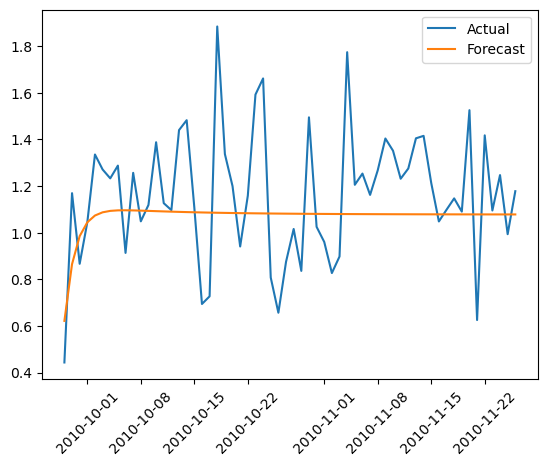

In [40]:
fig2 = plt.figure()
plt.plot(ds_test2.index, ds_test2.iloc[:,0], label='Actual');
plt.plot(ds_test2.index, predictions_60day, label='Forecast');
plt.xticks(rotation=45);
plt.legend();

**18. What is the mean absolute error between the test data for global active power and our 60 day prediction?**

Store your answer in a variable called `MAE2`

In [41]:
# Add your code below
MAE2 = mean_absolute_error(ds_test2.iloc[:,0], predictions_60day)


## 3) 1 month multi-step forecast.

As stated previously, multi-step forecasting involves making a prediction for one time step, taking the prediction, and feeding it into the model as an input in order to predict the subsequent time step. 

We repeat this process is until the we have forecasted the desired number of steps.

To read more about this, visit the article [here](https://machinelearningmastery.com/multi-step-time-series-forecasting-with-machine-learning-models-for-household-electricity-consumption/).

**19. Create a function `ms_forecast` which implements a multi-step forecast.** 

- The input should be the dataframe, `df`, and the number of steps to forecast, `n_obs`. 

- Begin by setting `preds` to be an empty list.

- The function should then contain a for loop that does the following:

    - 1) Loop from i being 0 to `n_obs`

    - In the loop:

    - 2) Define `model` to be a VAR model using the multivariate data, excluding the last `n_obs-i` values. 
    - Note: In this way, when i is 0, we will exclude the last n_obs days and forecast 1 step, when i is 1, we will exclude only the last n_obs-1 days and forecast another step. And so on until we have all the data except the last value which we forecast.

    - 3) Fit the model using `.fit()` and assign this to `model_fit`.

    - 4) Create a prediction using `.forecast` with the `model_fit.endog` and 1 step. 
    - Hint: the output of this will give you an array containing an array of 1-step forecasted values for all columns in our dataframe. As we are only interested in the first column, index the output of the forecast with `[0][0]`.

    - 5) Append the prediction to `preds`

- The function should return ` preds`.

In [42]:
# Add your code below
def ms_forecast(df, n_obs):
    preds = []
    
    for i in range(n_obs):
        train_data = df.iloc[:-n_obs+i]
        model_fit = VAR(train_data).fit()
        prediction = model_fit.forecast(y=model_fit.endog, steps=1)[0][0]
        preds.append(prediction)

    return preds
#     pass


**20. Use the function `ms_forecast` on `model_ds`, with `n_obs` = 30. Storing the output in a variable called `preds`.**

In [43]:
# Add your code below
preds = ms_forecast(model_ds, n_obs=30)


In [44]:
preds[0]

1.0830239241013198

Uncomment the following cell to plot the prediction with the actual values.

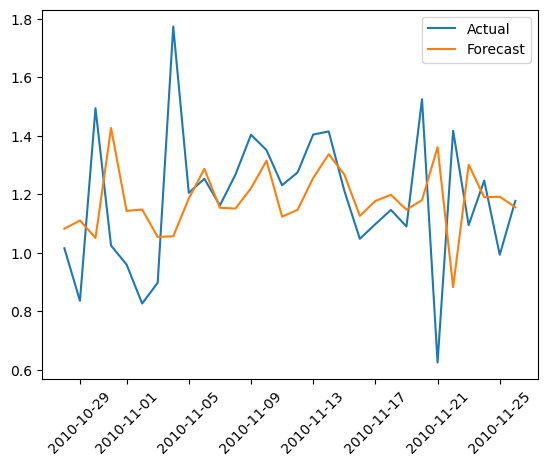

In [45]:
n_obs=30
fig3 = plt.figure()
plt.plot(model_ds.iloc[-n_obs:,0].index, model_ds.iloc[-n_obs:,0], label='Actual');
plt.plot(model_ds.iloc[-n_obs:,0].index, preds, label='Forecast');
plt.xticks(rotation=45);
plt.legend();

**21. What is the mean absolute error between the test data for global active power and our 30 day prediction?**

Store your answer in a variable called `MAE3`

*Hint*: you should compute the mean absolute error between vector `preds` and the last 30 rows of the first column of `model_ds`

In [46]:
# Add your code below
MAE3 = mean_absolute_error(model_ds.iloc[-n_obs:,0], preds)
